In [2]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

Vamos a cargar los datos en el dataframe insurance


In [3]:
# Data Loading

insurance = pd.read_csv('insurance.csv')
insurance.head()

print ("Original Size insurance", insurance.shape)

insurance.head(20)

Original Size insurance (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Veamos qué tipos de datos hay y si hay huecos

In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Cheking NaN /null values
insurance.isnull().sum()*100/insurance.shape[0]

#Ckeking NaN

#isNaN = pd.isna(salaries)
#print(isNaN)           

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

INICIAMOS PREPROCESAMIENTO para conocer mejor los datos

In [6]:
insurance.describe()  # Only numerical variables are presented

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


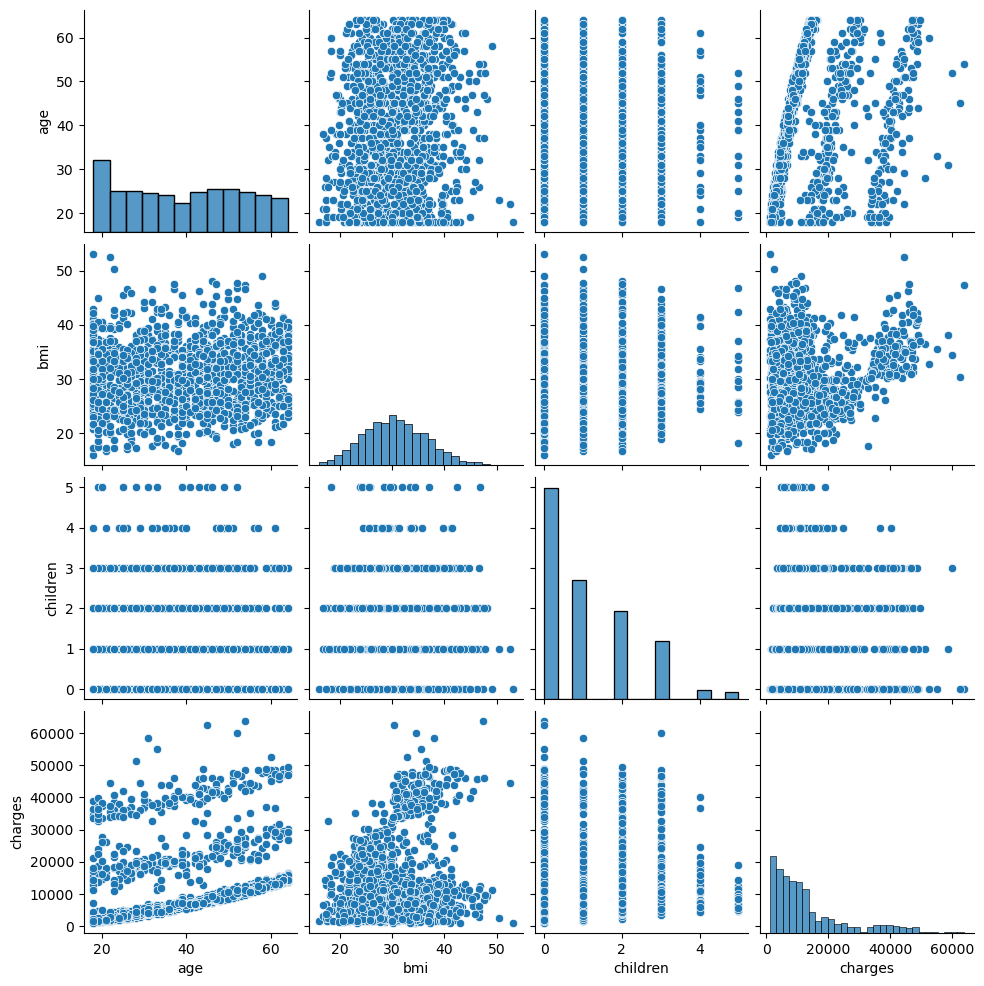

In [7]:
# plot numerical data as pairs
sns.pairplot(insurance);


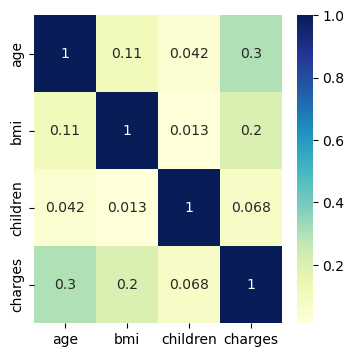

In [8]:
# Correlations
plt.figure(figsize=(4,4))
sns.heatmap(insurance.corr(), cmap="YlGnBu", annot = True)
plt.show()

SE ha visto cierta correlación por grupos de afe con charges

Procedemos a crear variables dummies

In [9]:
# Whole model
#print(salaries["discipline"].value_counts())

# Creation of a new dataframe including dummies in sex and rank (using prefix)
data=pd.get_dummies(insurance, columns=['sex','smoker','region'], prefix="dmy",drop_first=True)  # drop_first removes 0 values leaving k-1 levels

data.head()


               

,age,bmi,children,charges,dmy_male,dmy_yes,dmy_northwest,dmy_southeast,dmy_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


PREPARAMOS UN SUBCONJUNTO DE DATOS PARA TRAINING y TEST 

In [10]:
# Once the variables to use are known, we proceed to prepare the dataset with a partition for training and another one for test
###############################################################################################################################

from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
# ==============================================================================
X = data.iloc[:, [0, 1, 2, 4, 5, 6, 7, 8]]
y = data['charges']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        #y.values.reshape(-1,1),
                                        y,
                                        train_size   = 0.8,  # 80% for training
                                        random_state = 1234,
                                        shuffle      = True
                                    )



PREPARAMOS UN PRIMER MODELO con todas las variables

In [11]:
import statsmodels.api as sm

# Preparing exog and endg variables
X_all = X_train                
y_all = y_train

# Add a constant to get an intercept
X_all_sm = sm.add_constant(X_all)

# Fit the resgression line using ‘OLS’
model_all = sm.OLS(y_all, X_all_sm).fit()

print(model_all.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     395.3
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          5.60e-312
Time:                        16:46:58   Log-Likelihood:                -10841.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1061   BIC:                         2.174e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.117e+04   1132.278     -9.868

In [12]:
# It seems that the variable sex and region are not significant and they are removed

# Preparing exog and endg variables
X_all_simp = X_train.iloc[:, [0, 1, 2, 4]]                
y_all_simp = y_train

# Add a constant to get an intercept
X_all_simp_sm = sm.add_constant(X_all_simp)

# Fit the resgression line using ‘OLS’
model_all_simp = sm.OLS(y_all_simp, X_all_simp_sm).fit()

print(model_all_simp.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     789.5
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          1.07e-316
Time:                        16:46:58   Log-Likelihood:                -10843.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1065   BIC:                         2.172e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.145e+04   1079.990    -10.598      0.0

Parece que las variables eliminadas no han causado pérdida importante en la calidad del modelo

In [13]:
# VIF estimation

from statsmodels.stats.outliers_influence import variance_inflation_factor


print("Columns for VIF estimation", X_all_simp.columns)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_all_simp.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_all_simp.values, i)
                        for i in range(len(X_all_simp.columns))]

print(vif_data) 

Columns for VIF estimation Index(['age', 'bmi', 'children', 'dmy_yes'], dtype='object')
    feature       VIF
0       age  7.516852
1       bmi  8.101843
2  children  1.792918
3   dmy_yes  1.245718


In [14]:
# It seems that the variable bmi is colineal is not important. This is removed

# Preparing exog and endg variables
X_all_simp = X_train.iloc[:, [0, 2, 4]]                
y_all_simp = y_train

# Add a constant to get an intercept
X_all_simp_sm = sm.add_constant(X_all_simp)

# Fit the resgression line using ‘OLS’
model_all_simp = sm.OLS(y_all_simp, X_all_simp_sm).fit()

print(model_all_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     933.5
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          1.26e-297
Time:                        16:46:58   Log-Likelihood:                -10891.
No. Observations:                1070   AIC:                         2.179e+04
Df Residuals:                    1066   BIC:                         2.181e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2402.2477    611.278     -3.930      0.0

In [15]:
# We can try to remove age as colinear with bmi is not important. This is removed

# Preparing exog and endg variables
X_all_simp = X_train.iloc[:, [1, 2, 4]]                
y_all_simp = y_train

# Add a constant to get an intercept
X_all_simp_sm = sm.add_constant(X_all_simp)

# Fit the resgression line using ‘OLS’
model_all_simp = sm.OLS(y_all_simp, X_all_simp_sm).fit()

print(model_all_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     712.0
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          5.55e-254
Time:                        16:46:58   Log-Likelihood:                -10992.
No. Observations:                1070   AIC:                         2.199e+04
Df Residuals:                    1066   BIC:                         2.201e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3590.6645   1139.990     -3.150      0.0

Está claro que la eliminación de age causa un modelo peor. Ya se vio que age tiene cierta relación con charges

In [16]:
# It seems that the variable bmi is colineal is not important. This is removed

# Preparing exog and endg variables
X_all_simp = X_train.iloc[:, [0, 2, 4]]                
y_all_simp = y_train

# Add a constant to get an intercept
X_all_simp_sm = sm.add_constant(X_all_simp)

# Fit the resgression line using ‘OLS’
model_all_simp = sm.OLS(y_all_simp, X_all_simp_sm).fit()

print(model_all_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     933.5
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          1.26e-297
Time:                        16:46:58   Log-Likelihood:                -10891.
No. Observations:                1070   AIC:                         2.179e+04
Df Residuals:                    1066   BIC:                         2.181e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2402.2477    611.278     -3.930      0.0

In [17]:
# VIF estimation

from statsmodels.stats.outliers_influence import variance_inflation_factor


print("Columns for VIF estimation", X_all_simp.columns)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_all_simp.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_all_simp.values, i)
                        for i in range(len(X_all_simp.columns))]

print(vif_data) 

Columns for VIF estimation Index(['age', 'children', 'dmy_yes'], dtype='object')
    feature       VIF
0       age  1.862438
1  children  1.703410
2   dmy_yes  1.209305


Eliminadas las colinealidades

In [18]:
# Probamos interacciones

# Interaction of variables

# Model creation with interactions
# ===============================================
# Adding new column including the interaction
X_all_simp['age_children'] = X_all_simp['age'] * X_all_simp['children']
y_all_simp = y_train

# Add a constant to get an intercept
X_all_simp_sm = sm.add_constant(X_all_simp)

# Fit the resgression line using ‘OLS’
model_all_simp = sm.OLS(y_all_simp, X_all_simp_sm).fit()

print(model_all_simp.summary())






                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     699.6
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          3.80e-296
Time:                        16:46:58   Log-Likelihood:                -10891.
No. Observations:                1070   AIC:                         2.179e+04
Df Residuals:                    1065   BIC:                         2.182e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2238.0241    723.047     -3.095   

No parece sea buena la interaccion introducida y  por tanto el modelo definitivo será el previo

In [19]:
# Final model in training

# Preparing exog and endg variables
X_all_simp = X_train.iloc[:, [0, 2, 4]]                
y_all_simp = y_train

# Add a constant to get an intercept
X_all_simp_sm = sm.add_constant(X_all_simp)

# Fit the resgression line using ‘OLS’
model_all_simp = sm.OLS(y_all_simp, X_all_simp_sm).fit()

print(model_all_simp.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     933.5
Date:                Tue, 17 Oct 2023   Prob (F-statistic):          1.26e-297
Time:                        16:46:58   Log-Likelihood:                -10891.
No. Observations:                1070   AIC:                         2.179e+04
Df Residuals:                    1066   BIC:                         2.181e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2402.2477    611.278     -3.930      0.0

In [20]:
# Estimation error
# ==============================================================================
prediction_train =model_all_simp.predict(exog=X_all_simp_sm)

#Conversion series object to vector
prediction_train=prediction_train.to_numpy()


print ("pred real", prediction_train.shape, y_train.shape)

residuals_train   = y_all_simp-prediction_train

print ("pred real residual", prediction_train.shape, y_train.shape, residuals_train.shape)

pred real (1070,) (1070,)
pred real residual (1070,) (1070,) (1070,)


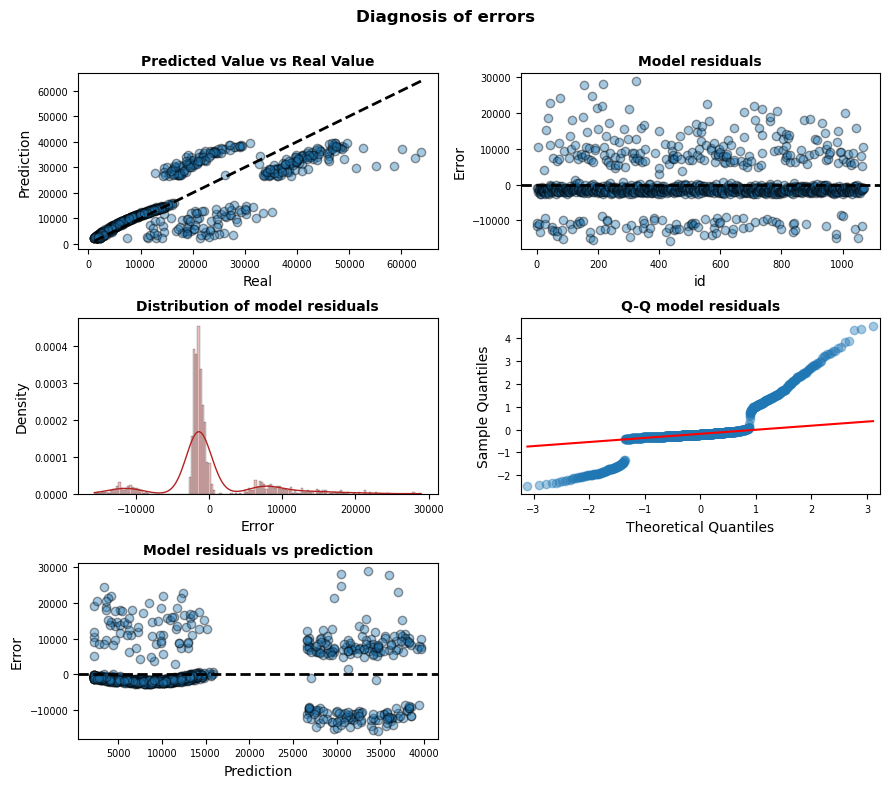

In [21]:
# Graphics
# ============================================
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))
y_train=y_all_simp


axes[0, 0].scatter(y_train, prediction_train, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Predicted Value vs Real Value', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Prediction')
axes[0, 0].tick_params(labelsize = 7)

axes[0, 1].scatter(list(range(len(y_train))), residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Model residuals', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Error')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuals_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

axes[1, 0].set_title('Distribution of model residuals', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Error")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuals_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)
axes[1, 1].set_title('Q-Q model residuals', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

axes[2, 0].scatter(prediction_train, residuals_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Model residuals vs prediction', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Prediction')
axes[2, 0].set_ylabel('Error')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnosis of errors', fontsize = 12, fontweight = "bold");

Examples with higher Cook distance [153 325  44 215 437 180 715 196 799  76]


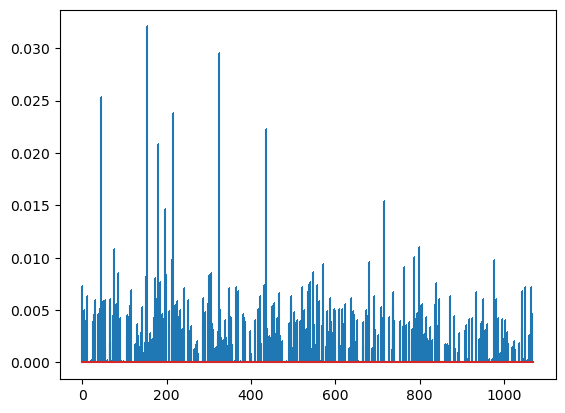

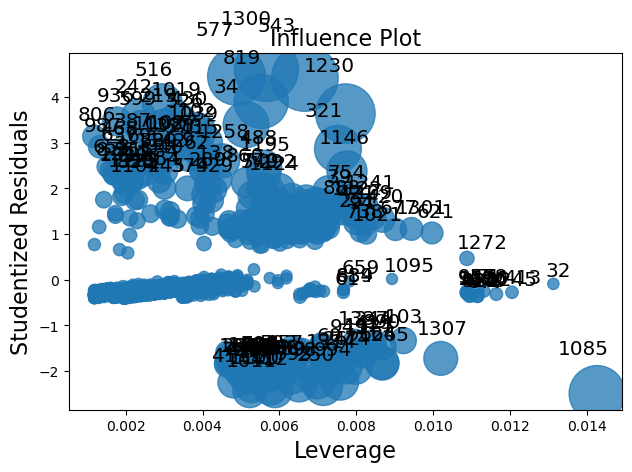

In [22]:
#' ## Cooks distance

influence = model_all_simp.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance

#PLotting Cook distance:
plt.stem(np.arange(len(c)), c, markerfmt=",")

# samples with higher coolk distancve
idx = (-c).argsort()[:10] # 10 cases

print("Examples with higher Cook distance", idx)


# Plotting influence graphic

#In statsmodels .influence_plot the influence of each point can be visualized by the criterion keyword argument. 
#Options are Cook’s distance and DFFITS, two measures of influence. 

#Steps to compute Cook’s distance:

#Delete observations one at a time.
#Refit the regression model on remaining (n−1) observations
#Examine how much all of the fitted values change when the ith observation is deleted.
fig = sm.graphics.influence_plot(model_all_simp, criterion="cooks")
fig.tight_layout(pad=1.0)

#To identify values with high influence, we look for observations with:

#big blue points (high Cook’s distance) and
#high leverage (X-axis) which additionally have
#high or low studentized residuals (Y-axis).


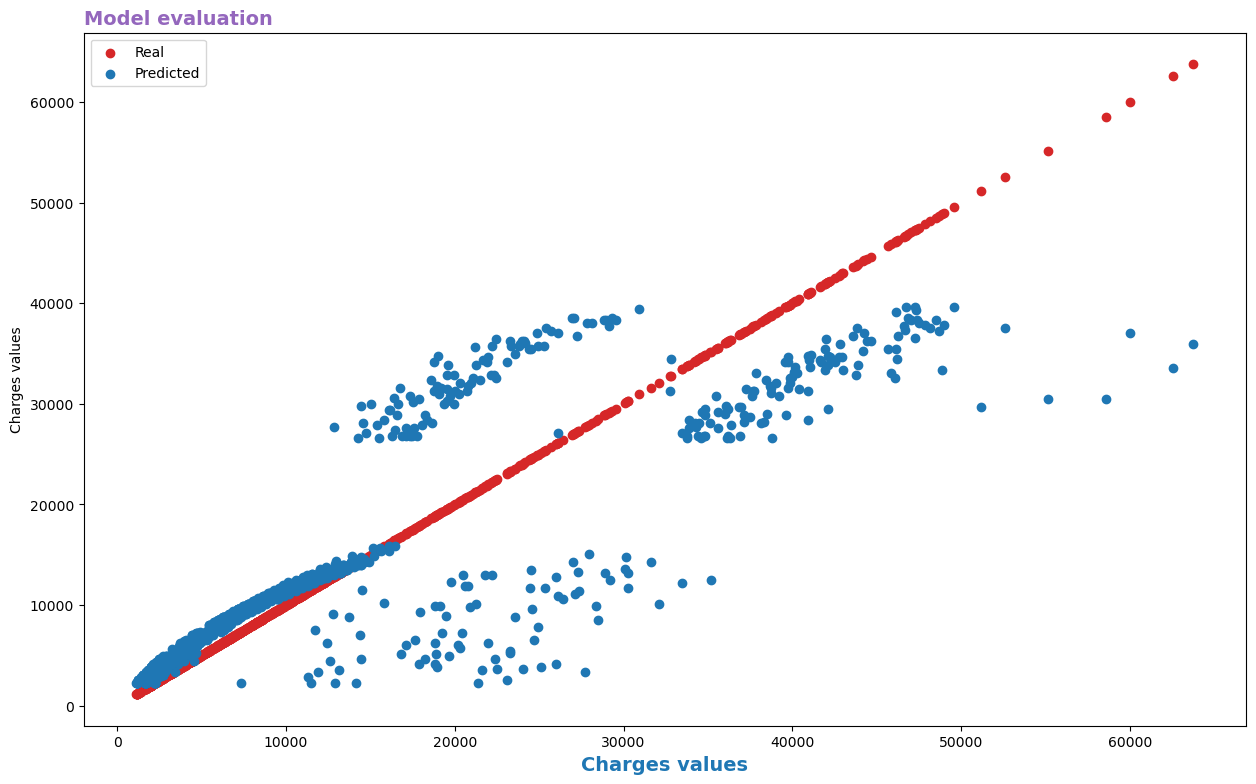

In [23]:
#######  TRAIN

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Charges values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Charges values")
ax.set_title('Model evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

In [24]:
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# Indicators of the model obtained
print('Mean Absolute Error - training:', metrics.mean_absolute_error(y_train, prediction_train))  
print('Mean Squared Error - training:', metrics.mean_squared_error(y_train, prediction_train))  
print('Root Mean Squared Error - training:', np.sqrt(metrics.mean_squared_error(y_train, prediction_train)))

Mean Absolute Error - training: 4075.017850953175
Mean Squared Error - training: 40574665.12347526
Root Mean Squared Error - training: 6369.824575565269


In [25]:
# Preparing exog and endg variables
X_all_simp_test = X_test.iloc[:, [0, 2, 4]]                
y_all_simp_test = y_test

# Add a constant to get an intercept
X_all_simp_sm_test = sm.add_constant(X_all_simp_test)

# Estimation error
# ==============================================================================
prediction_test =model_all_simp.predict(exog=X_all_simp_sm_test)

#Conversion series object to vector
prediction_test=prediction_test.to_numpy()


#print ("pred real", prediction_train.shape, y_train.shape)

residuals_test   = y_all_simp_test-prediction_test

#print ("pred real residual", prediction_train.shape, y_train.shape, residuals_train.shape)

<Axes: xlabel='charges', ylabel='Density'>

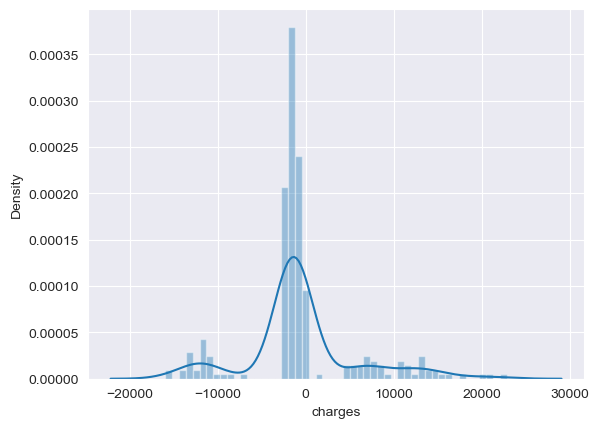

In [26]:
# Error in test
sns.set_style('darkgrid')
sns.distplot(residuals_test)

In [27]:
# Indicators of the model with test
print('Mean Absolute Error - test:', metrics.mean_absolute_error(y_test, prediction_test))  
print('Mean Squared Error - test:', metrics.mean_squared_error(y_test, prediction_test))  
print('Root Mean Squared Error - test:', np.sqrt(metrics.mean_squared_error(y_test, prediction_test)))

Mean Absolute Error - test: 4120.278043470653
Mean Squared Error - test: 40517985.95755089
Root Mean Squared Error - test: 6365.373984107367


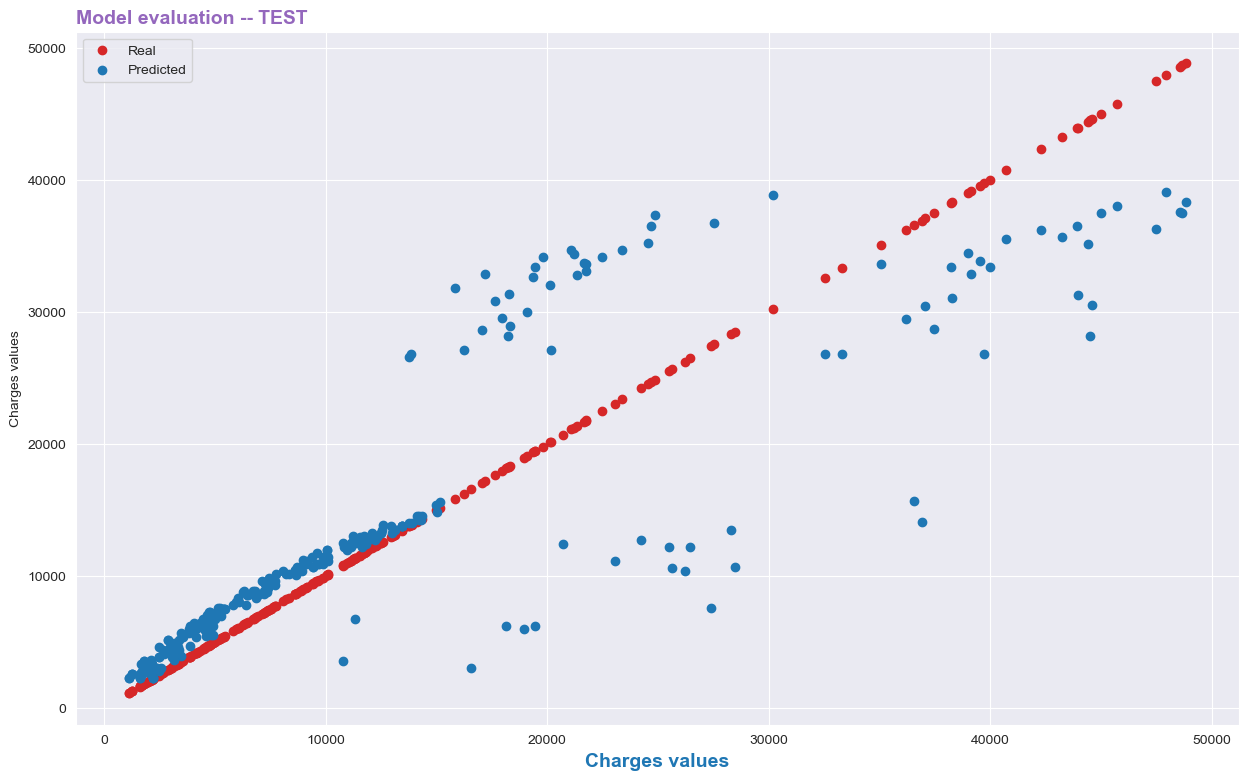

In [28]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Charges values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Charges values")
ax.set_title('Model evaluation -- TEST', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

Comportamiento similar en training y test

A la vista de los coeficientes del modelo la variable charges es influenciada más por vavariable smoker seguida
de children y age